<a href="https://colab.research.google.com/github/PAGIDIPALARAGHU/Data-science/blob/main/7150_project_Traffic_sign_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(42)
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


In [6]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/download?datasetVersionNumber=1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pagidipalaraghu
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:03<00:00, 170MB/s]


In [49]:
main_dir = '/content/gtsrb-german-traffic-sign'
path_train = '/content/gtsrb-german-traffic-sign/Train'

In [113]:
classes=pd.read_csv('Classes.csv')
class_dic= classes['class'].to_dict()
class_dic

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing veh over 3.5 tons',
 11: 'Right-of-way at intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Veh > 3.5 tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve left',
 20: 'Dangerous curve right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End speed + passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right'

In [37]:
no_class=len(classes['class'])
print(no_class)

43


In [114]:
data_train=pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv')
data_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [115]:
data_train['ClassId'].nunique()

43

In [119]:
for i in range(43):
   data_train.loc[data_train['ClassId']==i, 'ClassId'] = class_dic[i]
data_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,Dangerous curve right,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,Dangerous curve right,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,Dangerous curve right,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,Dangerous curve right,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,Dangerous curve right,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,End no passing veh > 3.5 tons,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,End no passing veh > 3.5 tons,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,End no passing veh > 3.5 tons,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,End no passing veh > 3.5 tons,Train/42/00042_00007_00028.png


In [126]:
data_dic=dict(data_train['ClassId'].value_counts())
sign_name=list(data_dic.keys())
total_signs=list(data_dic.values())

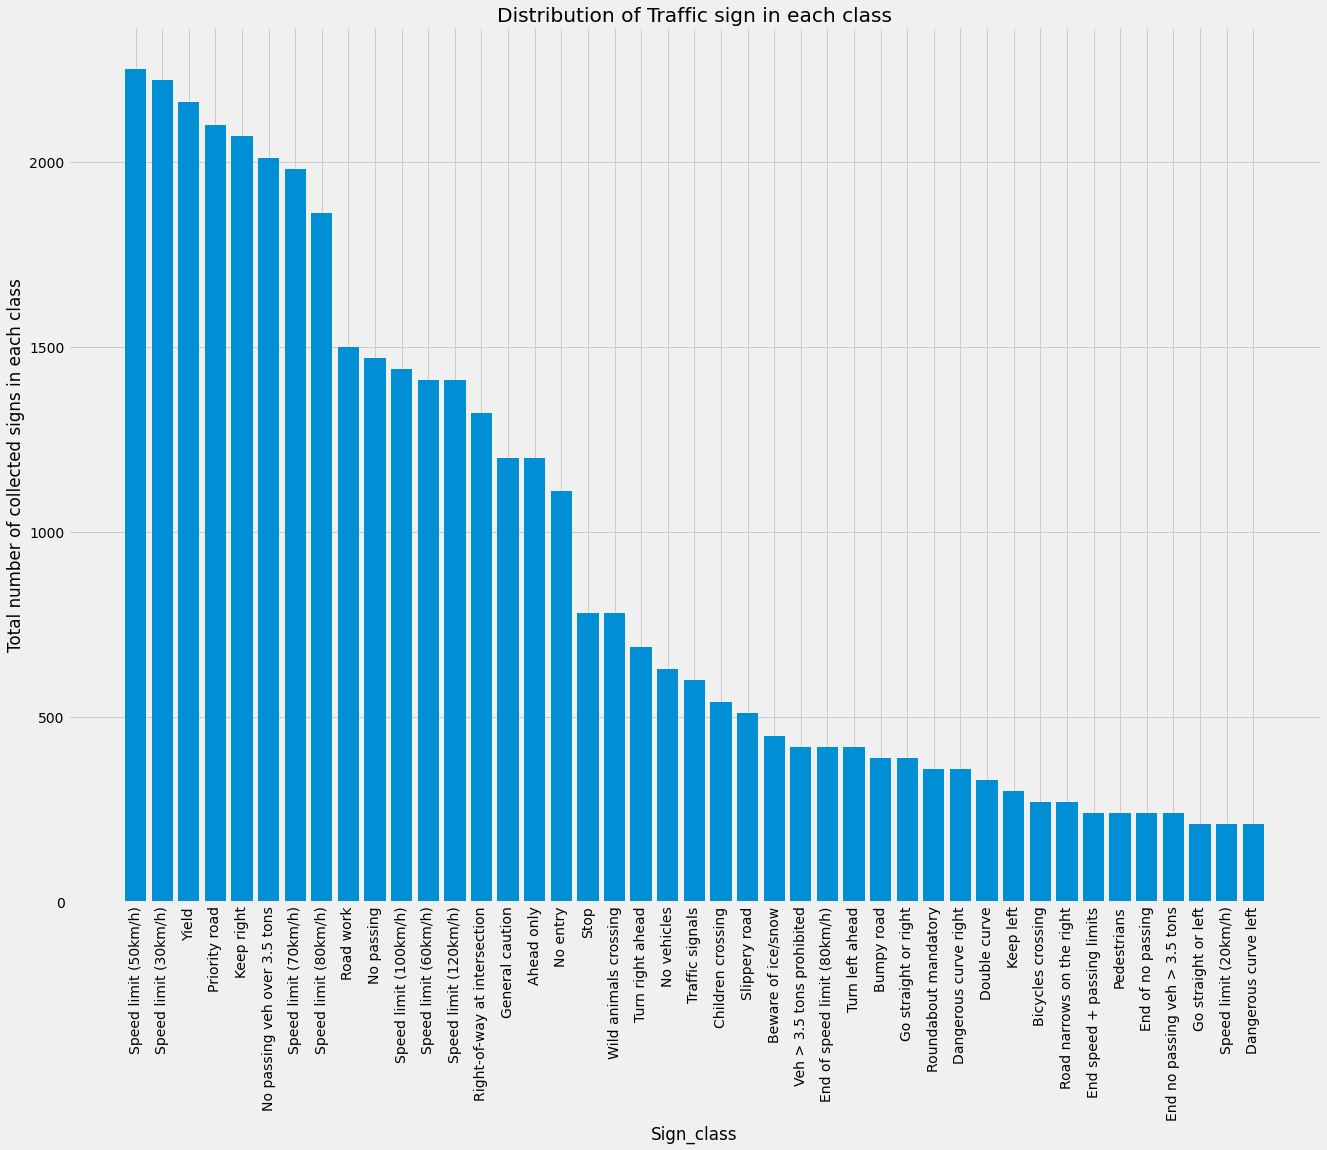

In [136]:
plt.figure(figsize=(20,15))
plt.bar(sign_name,total_signs)
plt.xlabel("Sign_class")
plt.ylabel("Total number of collected signs in each class")
plt.title("Distribution of Traffic sign in each class")
plt.xticks(sign_name,rotation='vertical')
plt.tick_params(colors='black')

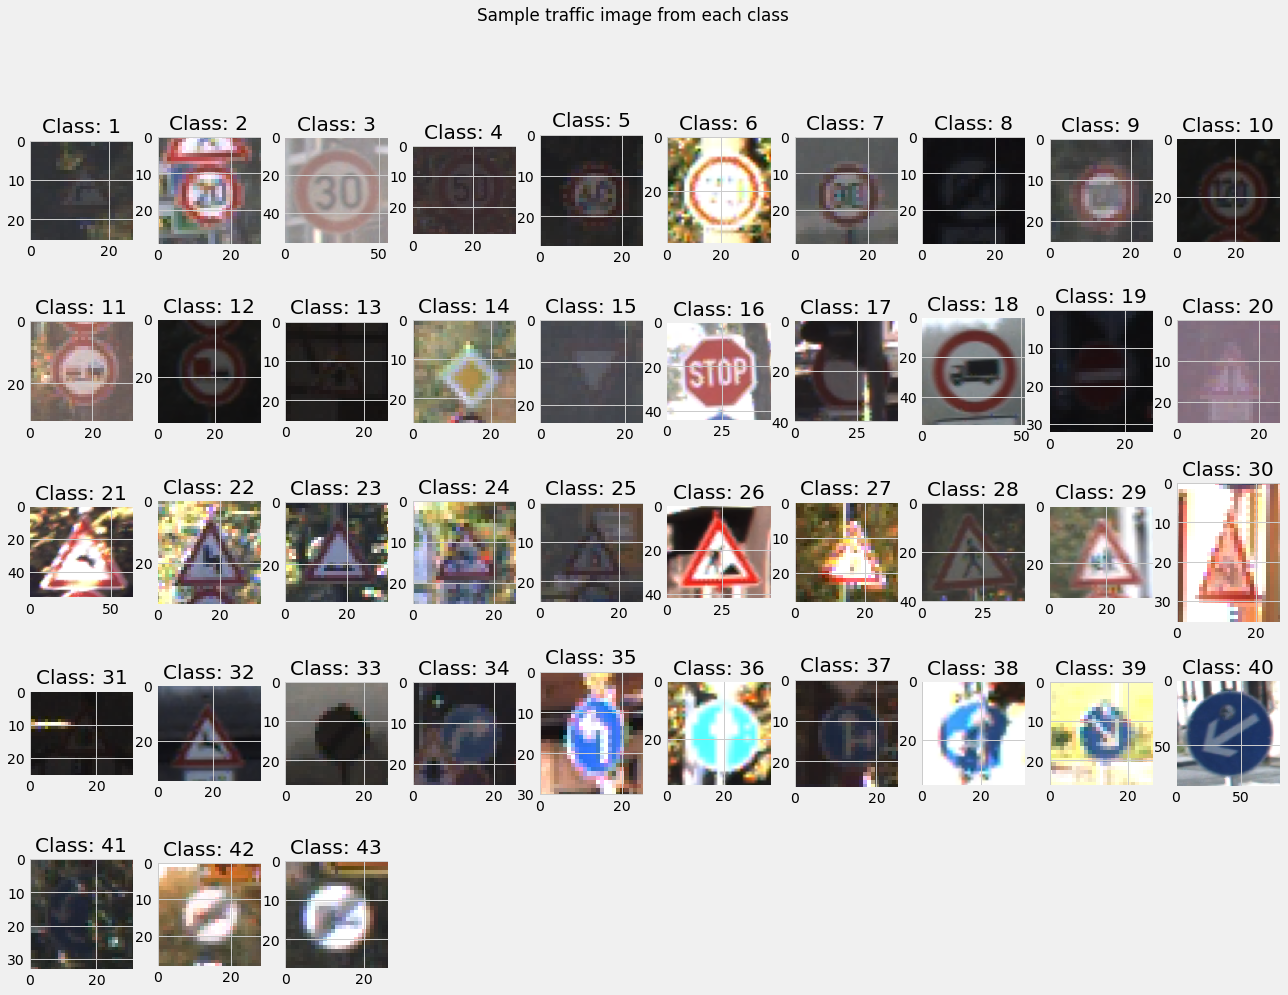

In [143]:
from matplotlib.image import imread
import matplotlib.image as mpimg
class_cat = []
sign_images= []
for index, sign_data in data_train.iterrows():
    file_name = sign_data['Path']
    class_id = sign_data['ClassId']
    if class_id not in class_cat:
        class_cat.append(class_id)
        sign_images.append(mpimg.imread(os.path.join(main_dir,file_name)))

plt.figure(figsize=(20,15))
plt.suptitle('Sample traffic image from each class')
columns = 10
for i, sign in enumerate(sign_images):
    plt.subplot(len(sign_images) / columns + 1, columns, i + 1)
    plt.title(f'Class: {i+1}', color='black')
    plt.imshow(sign)

In [152]:
sign_image_data = []
sign_image_labels = []
for i in range(no_class):
    path = path_train + '/'+ str(i)
    images = os.listdir(path)
    for sign in images:
        try:
            image_sign = cv2.imread(path + '/' + sign)
            sign_fromarray = Image.fromarray(image_sign, 'RGB')
            image_resize = sign_fromarray.resize((30,30))
            sign_image_data.append(np.array(image_resize))
            sign_image_labels.append(i)
        except:
            print("Error in " + sign)
# Changing the list to numpy array
sign_image_data = np.array(sign_image_data)
sign_image_labels = np.array(sign_image_labels)
print(sign_image_data.shape, sign_image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [153]:
ind_shufle = np.arange(sign_image_data.shape[0])
np.random.shuffle(ind_shufle)
sign_image_data = sign_image_data[ind_shufle]
sign_image_labels = sign_image_labels[ind_shufle]

In [154]:
X_train, X_val, y_train, y_val = train_test_split(sign_image_data, sign_image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [155]:
y_train = keras.utils.to_categorical(y_train, no_class)
y_val = keras.utils.to_categorical(y_val, no_class)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [165]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])
lr = 0.001
epochs = 5

optr = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=optr, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [166]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 19s 21ms/step - loss: 1.0191 - accuracy: 0.7283 - val_loss: 0.0896 - val_accuracy: 0.9754
Epoch 2/5
858/858 [==============================] - 18s 21ms/step - loss: 0.1578 - accuracy: 0.9515 - val_loss: 0.0234 - val_accuracy: 0.9938
Epoch 3/5
858/858 [==============================] - 18s 21ms/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 4/5
858/858 [==============================] - 21s 24ms/step - loss: 0.0616 - accuracy: 0.9825 - val_loss: 0.0075 - val_accuracy: 0.9974
Epoch 5/5
858/858 [==============================] - 18s 21ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0098 - val_accuracy: 0.9968


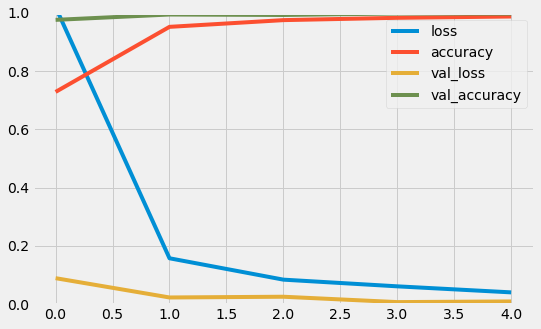

In [167]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [171]:
test_data = pd.read_csv("/content/gtsrb-german-traffic-sign/Test.csv")

test_labels = test_data["ClassId"].values
test_sign = test_data["Path"].values
test_sign_data =[]
for sign in test_sign:
    try:
        sign_image = cv2.imread(main_dir + '/' +sign)
        sign_image_fromarray = Image.fromarray(sign_image, 'RGB')
        resize_image = sign_image_fromarray.resize((30, 30))
        test_sign_data.append(np.array(resize_image))
    except:
        print("Error in " + sign)
X_test = np.array(test_sign_data)
X_test = X_test/255

# pred = model.predict_classes(X_test)
predict = np.argmax(model.predict(X_test), axis=-1)
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, predict)*100)

395/395 [==============================] - 1s 3ms/step
Test Data accuracy:  97.64845605700712


In [173]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, predict)

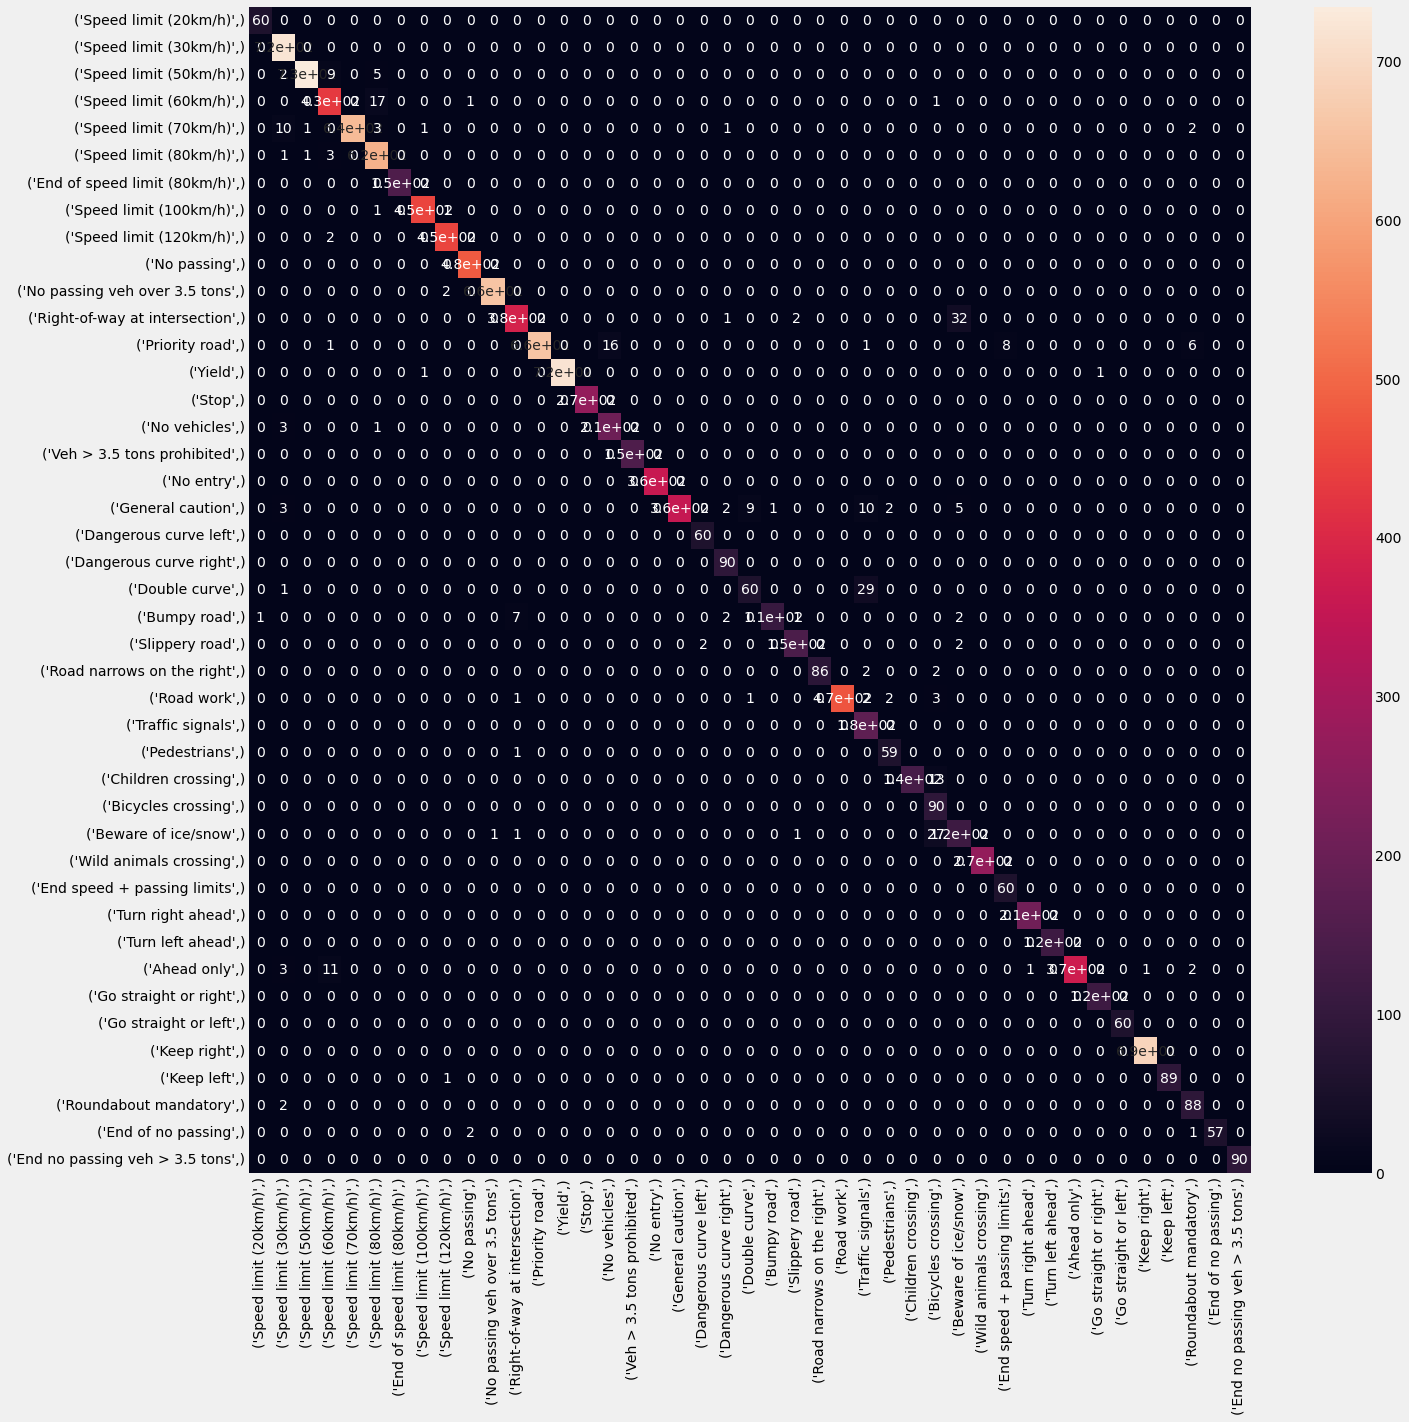

In [174]:
import seaborn as sns
data_cnf_matrix = pd.DataFrame(cnf_matrix, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(data_cnf_matrix, annot=True)

In [190]:
from sklearn.metrics import classification_report
classification_report=classification_report(test_labels, predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.97      1.00      0.98       720
           2       1.00      0.98      0.99       750
           3       0.94      0.96      0.95       450
           4       1.00      0.97      0.99       660
           5       0.96      0.99      0.98       630
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00       450
           8       0.99      1.00      0.99       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.97      0.92      0.94       420
          12       1.00      0.95      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.93      0.98      0.95       210
          16       1.00      1.00      1.00       150
          17       1.00    

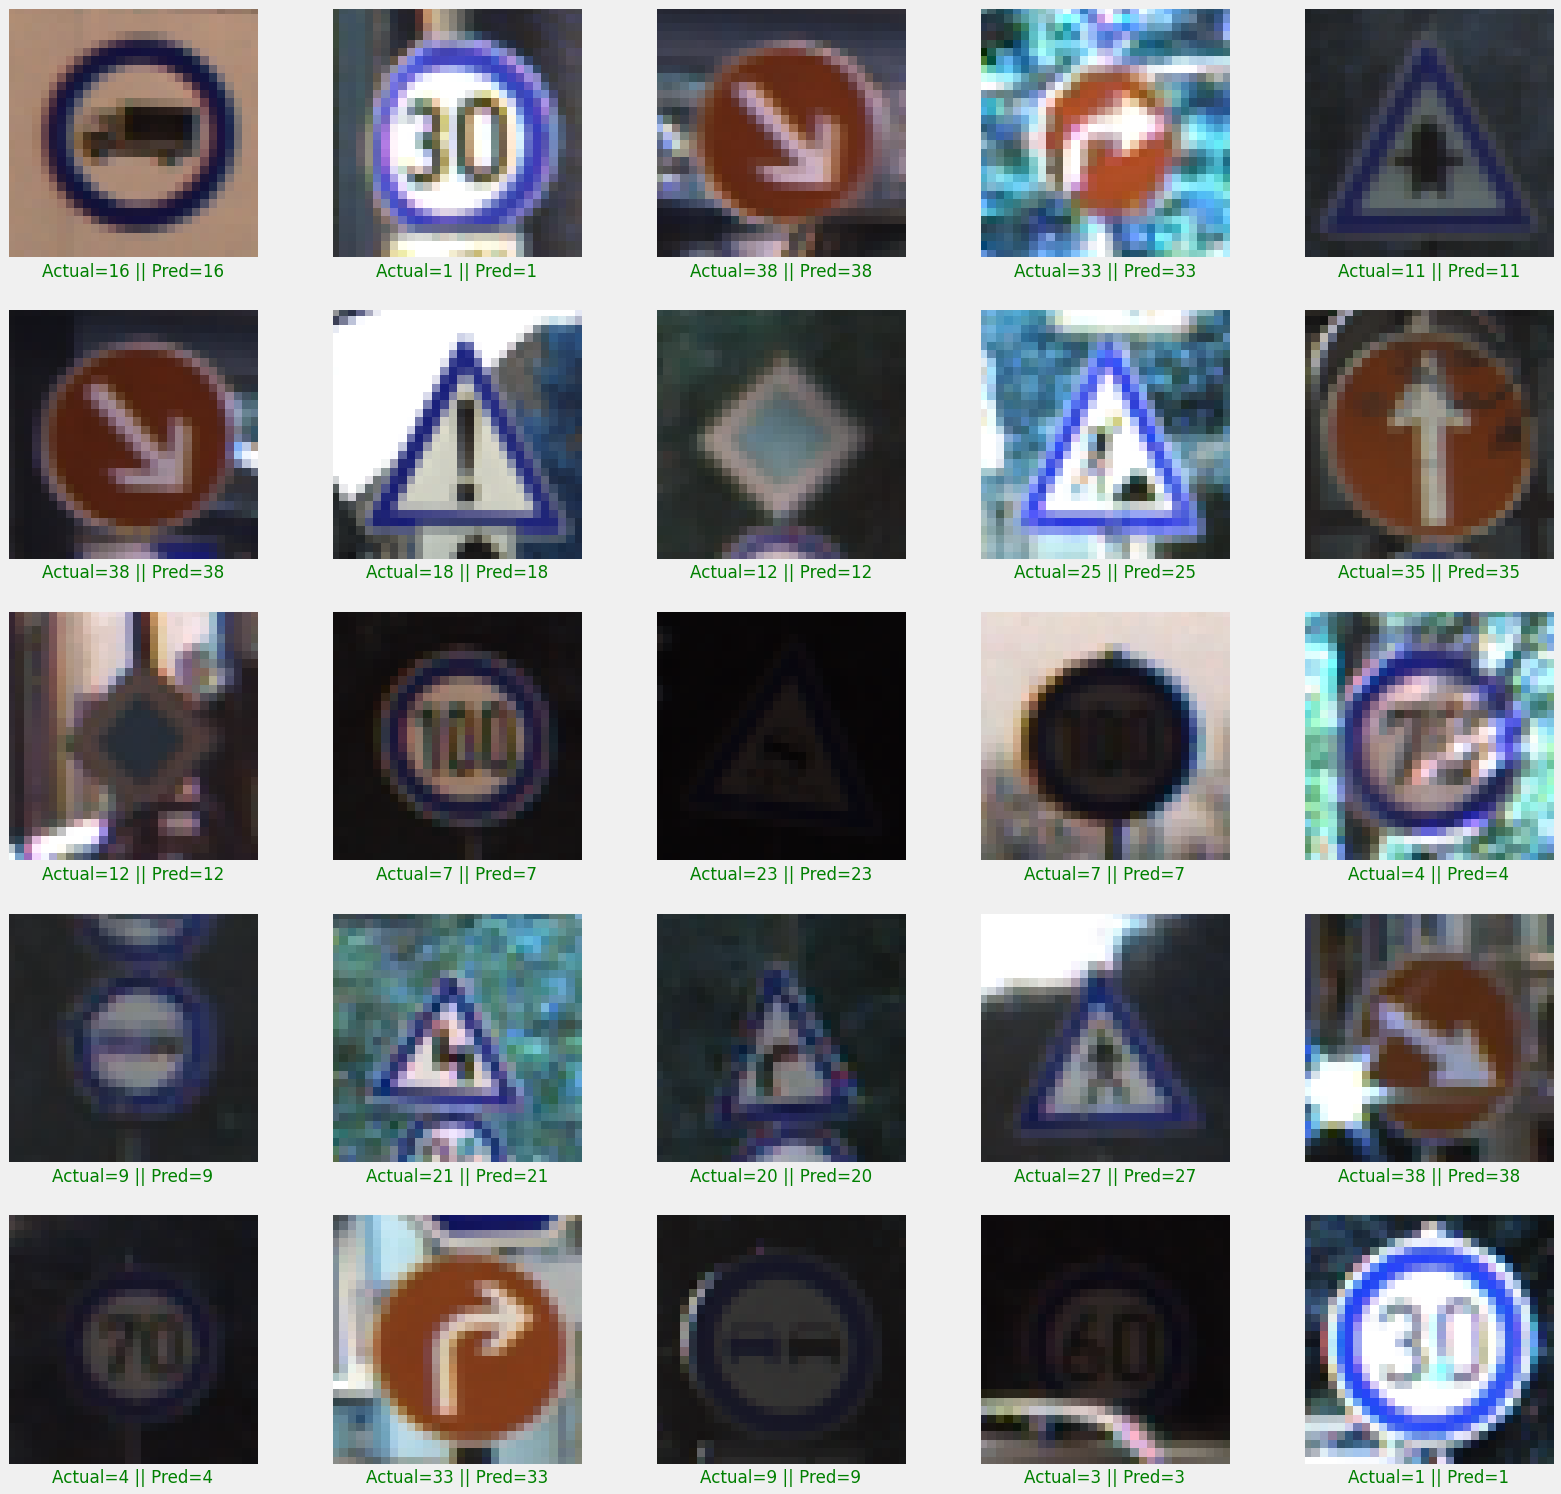

In [195]:
plt.figure(figsize = (25, 25))
index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    prediction = predict[index + i]
    actual = test_labels[index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color=col)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index + i])
plt.show()